In [1]:
from cmath import nan
import pandas as pd 
import numpy as np 
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [2]:
miss_v=['?',np.nan,' ']
df=pd.read_csv("Train.csv",na_values=miss_v)
dft=pd.read_csv("Test.csv",na_values=miss_v)
df.dropna(how='all')
df.fillna(0,inplace=True)
df['family history'].replace(['Yes','No'],[1,0],inplace=True)
df.rename(columns={'family history':'family_hist'},inplace=True)
dft.dropna(how='all')
dft.fillna(0,inplace=True)
dft['family history'].replace(['Yes','No'],[1,0],inplace=True)
dft.rename(columns={'family history':'family_hist'},inplace=True)
print(df.shape)
df.describe

(412, 24)


<bound method NDFrame.describe of       ID  Cough  Shortness of breath  Fatigue  body aches  Headache  \
0    309      2                    3        2           0       2.0   
1    486      2                    2        1           0       0.0   
2    199      3                    3        3           0       2.0   
3    495      2                    1        3           0       2.0   
4    401      3                    2        2           0       0.0   
..   ...    ...                  ...      ...         ...       ...   
407  355      2                    2        2           0       0.0   
408  231      3                    2        3           0       2.0   
409   22      3                    3        2           0       0.0   
410  192      1                    1        1           0       2.0   
411  233      2                    2        3           0       0.0   

     Loss of taste  family_hist  Loss of smell  Nausea  ...  \
0                0            1              2    

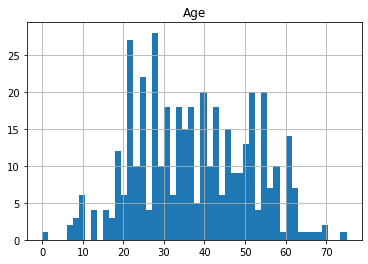

In [3]:
df.hist(column='Age',bins=50); #here we can see the outliers in the Age category

#outliers are odd data points which may affect the efficiency of our trained model

In [4]:
maxthreshhold=df['Age'].quantile(0.995)
minthreshhold=df['Age'].quantile(0.001)
maxthreshhold,minthreshhold 

# finding out bounds for noticing outliers

(69.88999999999999, 2.8770000000000002)

In [5]:
 df[df.Age<minthreshhold]

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family_hist,Loss of smell,Nausea,...,Region,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Pre-existing symptoms,Age,Variant
410,192,1,1,1,0,2.0,2,1,2,0.0,...,Africa,0,2,0,0,0,0,0.0,0,Variant 1


In [6]:
 df[df.Age>maxthreshhold]

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family_hist,Loss of smell,Nausea,...,Region,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Pre-existing symptoms,Age,Variant
59,191,2,2,0,0,0.0,0,1,0,0.0,...,Europe,0,0,0,3,0,0,0.0,70,Variant 4
69,293,2,3,2,0,3.0,2,1,2,0.0,...,Americas,2,0,0,0,0,0,0.0,70,Variant 1
96,498,2,2,2,0,3.0,0,0,0,0.0,...,East Mediterranean,0,2,3,0,0,0,0.0,75,Variant 1


In [7]:
df2=df[(df.Age<maxthreshhold) & (df.Age>minthreshhold)] #elimination of outliers
df=df2
df.shape

(408, 24)

Text(0.5, 1.0, 'DF')

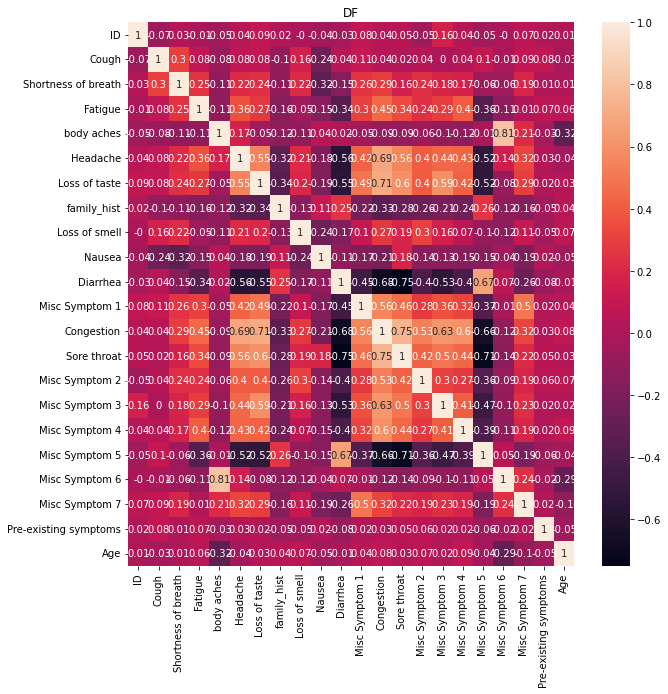

In [8]:

corr_df=df.corr().round(2)
plt.figure(figsize=(10,10))
plot=sns.heatmap(corr_df,annot=True)
plot.set_title("DF")

Text(0.5, 1.0, 'Variant 1')

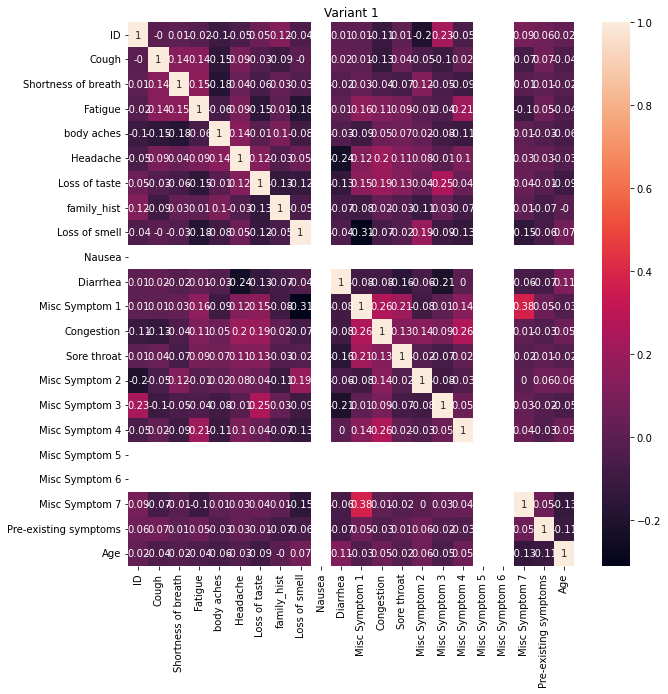

In [9]:
v1=df.loc[df.Variant=="Variant 1"]
corr_v1=v1.corr().round(2)
plt.figure(figsize=(10,10))
plot=sns.heatmap(corr_v1,annot=True)
plot.set_title("Variant 1")

#here we see that nausea, misc symptoms 5 and 6 has no corelation to variant 1

Text(0.5, 1.0, 'Variant 2')

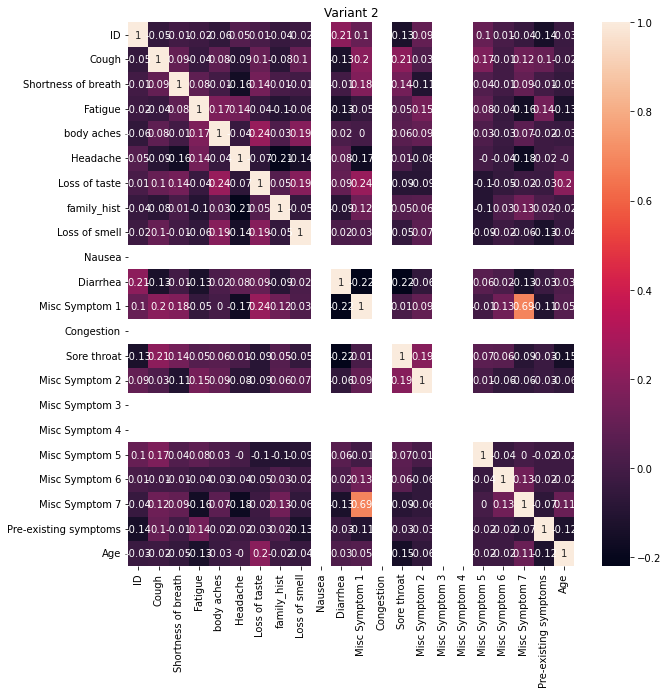

In [10]:
v2=df.loc[df.Variant=="Variant 2"]
corr_v2=v2.corr().round(2)
plt.figure(figsize=(10,10))
plot=sns.heatmap(corr_v2,annot=True)
plot.set_title("Variant 2")

#here we see that nausea, congestion, misc symptom 3 and 4 have no correlation for variant 2
#at the same time there is a heavy correlation between misc symptom 1 and 7 for variant 2

Text(0.5, 1.0, 'Variant 3')

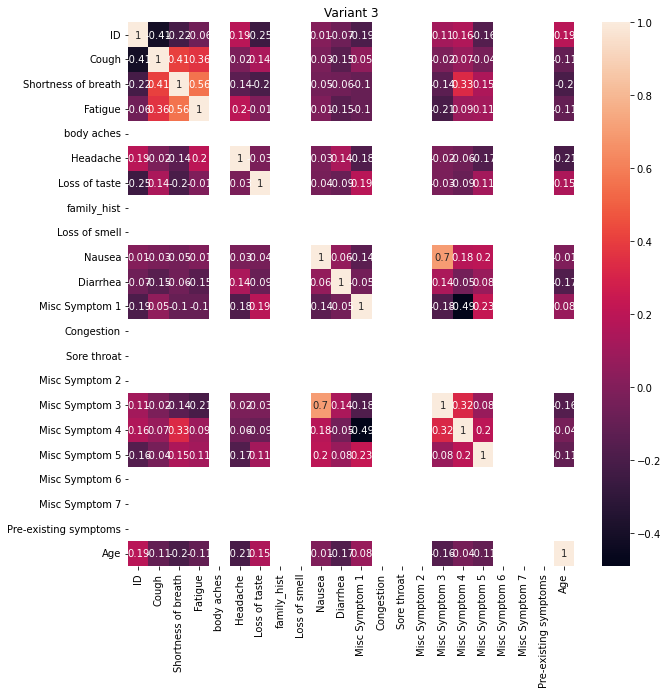

In [11]:
v3=df.loc[df.Variant=="Variant 3"]
corr_v3=v3.corr().round(2)
plt.figure(figsize=(10,10))
plot=sns.heatmap(corr_v3,annot=True)
plot.set_title("Variant 3")

# here we see that body aches, loss of smell, congestion, sore throat, misc symptom 2, 6 and 7 have no correlation for variant 3
# at the same time we see a heavy correlation between nausea and misc symptom 3 and an unavoidable correlation between fatigue and shortness of breath for variant 3

Text(0.5, 1.0, 'Variant 4')

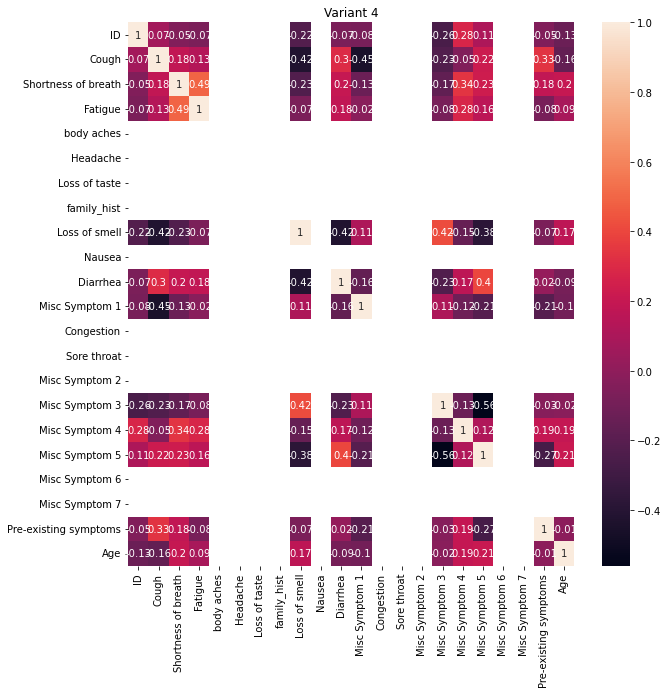

In [12]:
v4=df.loc[df.Variant=="Variant 4"]
corr_v4=v4.corr().round(2)
plt.figure(figsize=(10,10))
plot=sns.heatmap(corr_v4,annot=True)
plot.set_title("Variant 4")

# here we see that body aches, headaches, loss of taste, nausea, congestion, sore throat misc symptom 2,6 and 7 for variant 4
# and there is a noticable correlation between fatigue and shortness of breath, and loss of smell and misc symptom 3 for variant 4

Text(0.5, 1.0, 'Variant 5')

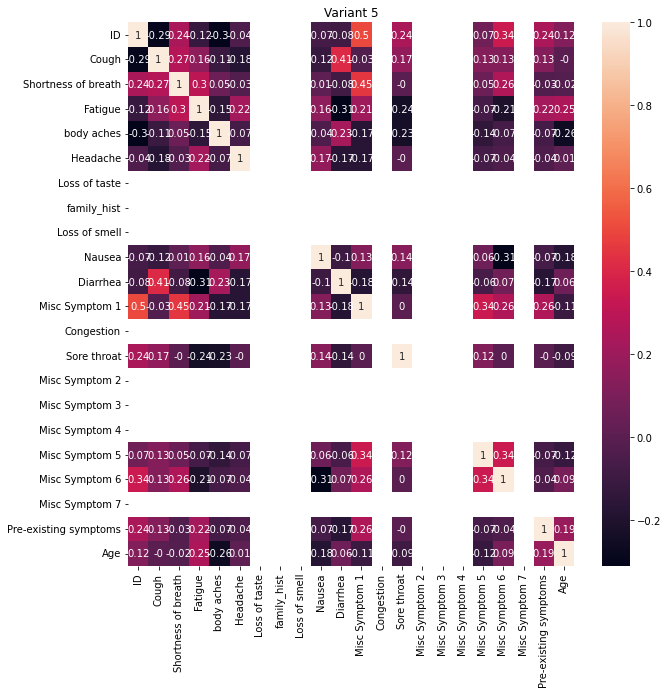

In [13]:
v5=df.loc[df.Variant=="Variant 5"]
corr_v5=v5.corr().round(2)
plt.figure(figsize=(10,10))
plot=sns.heatmap(corr_v5,annot=True)
plot.set_title("Variant 5")

# here we see that loss of taste and smell congestion misc symptom 2,3,4 and 7  have no correlation for the variant 5
# but we see a noticable correlation between shortness of breath and misc symptom 1, and cough and diarrhea for variant 5

Text(0.5, 1.0, 'Variant 6')

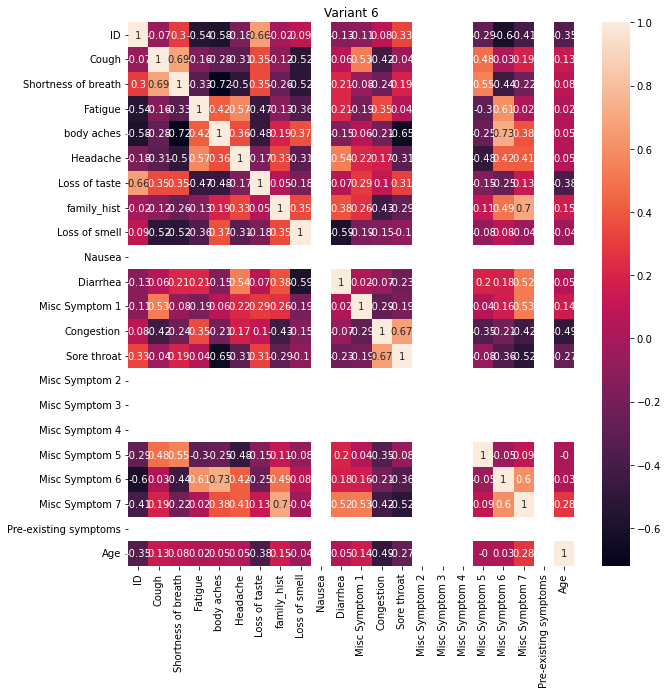

In [14]:
v6=df.loc[df.Variant=="Variant 6"]
corr_v6=v6.corr().round(2)
plt.figure(figsize=(10,10))
plot=sns.heatmap(corr_v6,annot=True)
plot.set_title("Variant 6")

# here we see that nausea misc symptoms 2,3, and 4 have no correlation for variant 6
# and there is a strong correlation between misc symptom 6 and body aches, and between cough and shortness of breath and between congestion and sore throat, and between family history and misc symptom 7 for variant 6

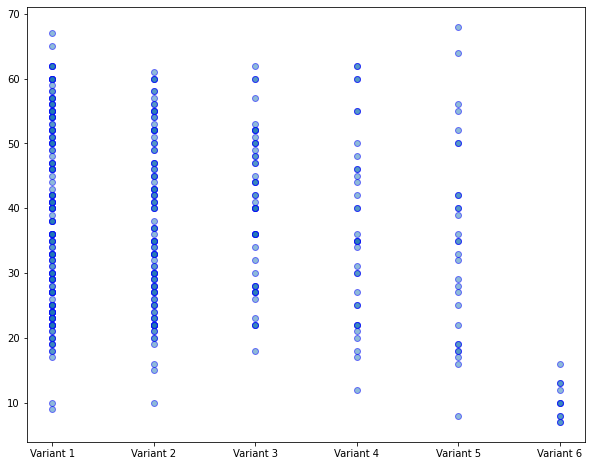

In [15]:
rcParams['figure.figsize']= 10,8
plt.scatter(df.Variant,df.Age,alpha=0.5,edgecolor='b')

# here we see that variant 6 is especially prominent in children especially between the ages 6 and 15
# we also see that variant 1 is the most prominent and common variant after which comes variant 2 then 3 or 4 then 5 and then 6

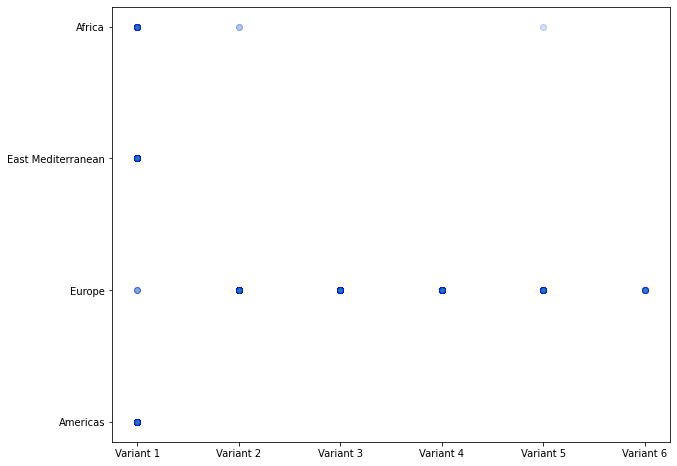

In [16]:
plt.scatter(df.Variant,df.Region,alpha=0.2,edgecolor='b')

#here we see that variant 1 is most prevelant in africa east mediterranean and americas while all other variants have peak prevelancy in europe
#we also see that europe is the most affected region after which comes africa

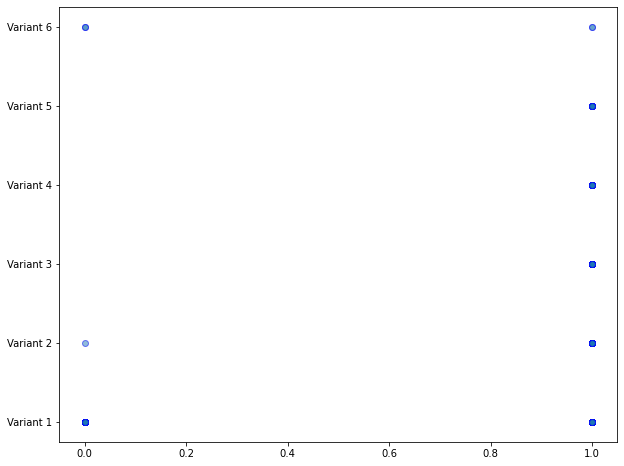

In [17]:
plt.scatter(df.family_hist,df.Variant,alpha=0.2,edgecolor='b')

# here we see that variant 5, 4 and 3 only occur when there is a family history of the disease
# while variant 2 can happen in either cases, but it is most probable the case where there has been a family history than not.

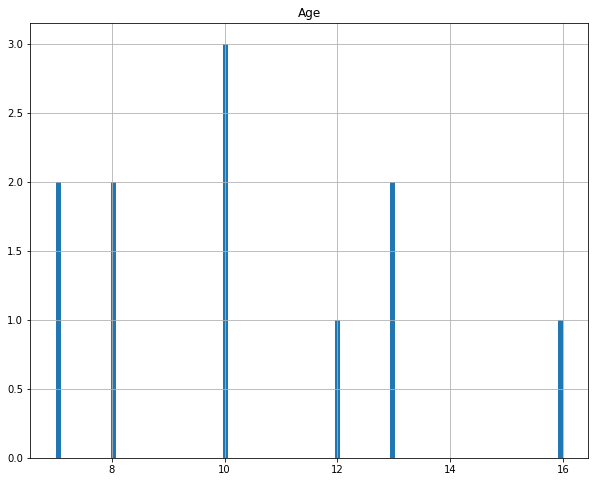

In [18]:
v6.hist(column='Age',bins=100);

# here we get to see a more detailed age wise categorization of the induvidual data points in each variant

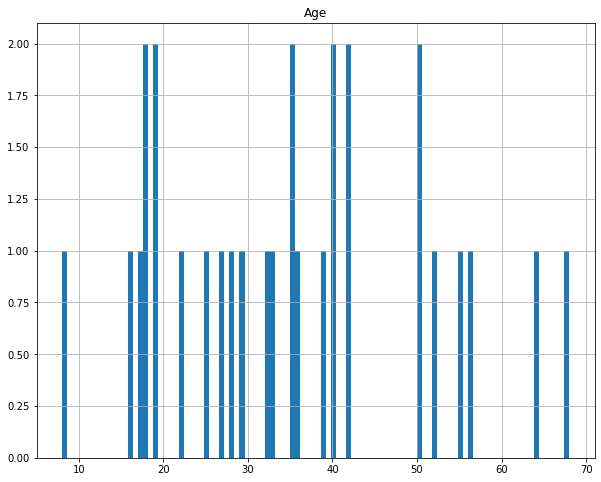

In [19]:
v5.hist(column='Age',bins=100);

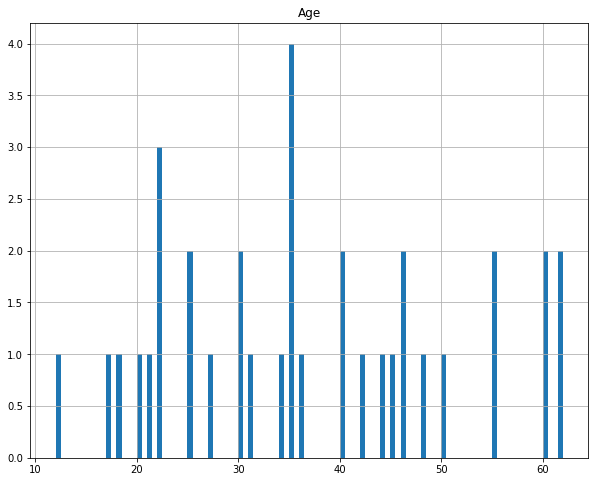

In [20]:
v4.hist(column='Age',bins=100);

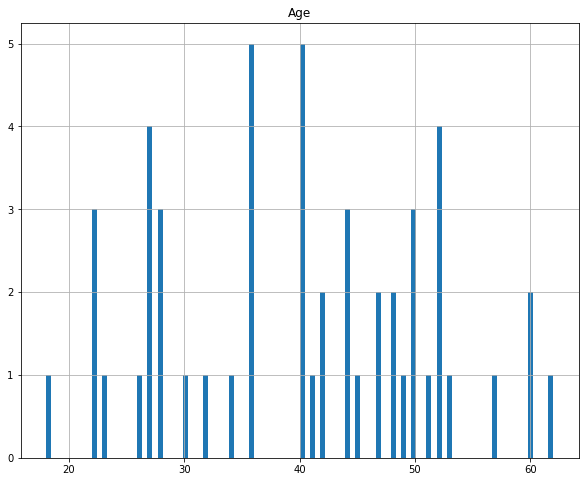

In [21]:
v3.hist(column='Age',bins=100);

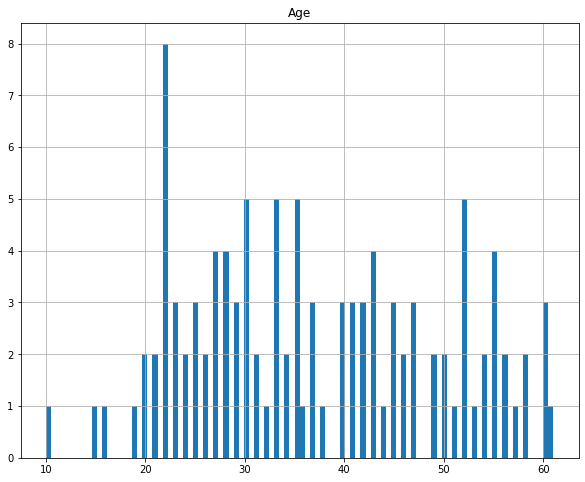

In [22]:
v2.hist(column='Age',bins=100);

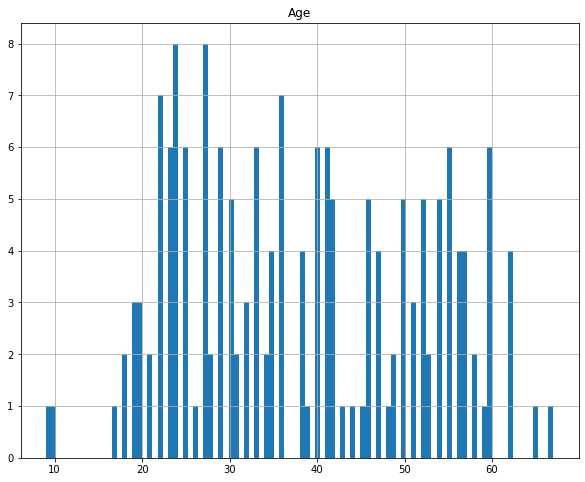

In [23]:
v1.hist(column='Age',bins=100);

In [24]:
v1.describe()
#here we see the mean standard deviation and count of data for variant 1

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family_hist,Loss of smell,Nausea,...,Congestion,Sore throat,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Pre-existing symptoms,Age
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.0,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.0,172.0,172.000000,172.000000,172.000000
mean,305.651163,2.232558,2.209302,2.046512,0.034884,1.575581,1.552326,0.709302,1.104651,0.0,...,2.116279,2.226744,0.860465,1.104651,1.250000,0.0,0.0,1.104651,0.023256,38.500000
std,165.676093,0.624536,0.650978,0.628876,0.213447,1.054141,1.010266,0.455410,0.892189,0.0,...,0.691106,0.640527,0.938617,0.930686,1.134906,0.0,0.0,1.154995,0.151155,13.558407
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,9.000000
25%,158.750000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,27.000000
50%,307.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.0,...,2.000000,2.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.000000,37.000000
75%,439.250000,3.000000,3.000000,2.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.0,...,3.000000,3.000000,2.000000,2.000000,2.000000,0.0,0.0,2.000000,0.000000,51.000000
max,583.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,3.000000,0.0,...,3.000000,3.000000,3.000000,3.000000,3.000000,0.0,0.0,3.000000,1.000000,67.000000


In [25]:
v2.describe()
#here we see the mean standard deviation and count of data for variant 2

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family_hist,Loss of smell,Nausea,...,Congestion,Sore throat,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Pre-existing symptoms,Age
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.0,...,110.0,110.000000,110.000000,110.0,110.0,110.000000,110.000000,110.000000,110.000000,110.000000
mean,282.027273,2.381818,2.045455,0.863636,0.027273,0.054545,0.109091,0.972727,1.118182,0.0,...,0.0,0.154545,0.127273,0.0,0.0,2.181818,0.027273,0.645455,0.009091,37.045455
std,167.020268,0.590161,0.564815,0.795368,0.163622,0.228130,0.391315,0.163622,0.798299,0.0,...,0.0,0.491886,0.385734,0.0,0.0,0.780282,0.163622,0.862962,0.095346,12.520359
min,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,10.000000
25%,150.500000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000000,0.000000,27.000000
50%,275.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000000,0.000000,35.000000
75%,411.750000,3.000000,2.000000,1.750000,0.000000,0.000000,0.000000,1.000000,2.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,3.000000,0.000000,1.000000,0.000000,47.000000
max,584.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.0,...,0.0,2.000000,2.000000,0.0,0.0,3.000000,1.000000,3.000000,1.000000,61.000000


In [26]:
v3.describe()
#here we see the mean standard deviation and count of data for variant 3

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family_hist,Loss of smell,Nausea,...,Congestion,Sore throat,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Pre-existing symptoms,Age
count,51.000000,51.000000,51.000000,51.000000,51.0,51.000000,51.000000,51.0,51.0,51.000000,...,51.0,51.0,51.0,51.000000,51.000000,51.000000,51.0,51.0,51.0,51.000000
mean,272.196078,2.078431,1.647059,2.039216,0.0,0.039216,0.039216,1.0,0.0,0.078431,...,0.0,0.0,0.0,0.058824,0.333333,1.372549,0.0,0.0,0.0,40.058824
std,167.099015,0.627475,0.657983,0.691687,0.0,0.280056,0.196039,0.0,0.0,0.392078,...,0.0,0.0,0.0,0.420084,0.739369,1.148230,0.0,0.0,0.0,11.363823
min,10.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,18.000000
25%,158.500000,2.000000,1.000000,2.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,29.000000
50%,251.000000,2.000000,2.000000,2.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,2.000000,0.0,0.0,0.0,40.000000
75%,396.500000,2.000000,2.000000,2.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,2.000000,0.0,0.0,0.0,49.500000
max,587.000000,3.000000,3.000000,3.000000,0.0,2.000000,1.000000,1.0,0.0,2.000000,...,0.0,0.0,0.0,3.000000,2.000000,3.000000,0.0,0.0,0.0,62.000000


In [27]:
v4.describe()
#here we see the mean standard deviation and count of data for variant 4

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family_hist,Loss of smell,Nausea,...,Congestion,Sore throat,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Pre-existing symptoms,Age
count,35.000000,35.000000,35.000000,35.000000,35.0,35.0,35.0,35.0,35.000000,35.0,...,35.0,35.0,35.0,35.000000,35.000000,35.000000,35.0,35.0,35.000000,35.000000
mean,284.428571,1.828571,1.485714,1.314286,0.0,0.0,0.0,1.0,0.142857,0.0,...,0.0,0.0,0.0,0.028571,0.400000,1.971429,0.0,0.0,0.028571,36.771429
std,162.646366,0.617667,0.507093,0.676123,0.0,0.0,0.0,0.0,0.355036,0.0,...,0.0,0.0,0.0,0.169031,0.553066,0.617667,0.0,0.0,0.169031,14.054695
min,35.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,12.000000
25%,136.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,2.000000,0.0,0.0,0.000000,25.000000
50%,297.000000,2.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,2.000000,0.0,0.0,0.000000,35.000000
75%,408.000000,2.000000,2.000000,2.000000,0.0,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,1.000000,2.000000,0.0,0.0,0.000000,46.000000
max,578.000000,3.000000,2.000000,2.000000,0.0,0.0,0.0,1.0,1.000000,0.0,...,0.0,0.0,0.0,1.000000,2.000000,3.000000,0.0,0.0,1.000000,62.000000


In [28]:
v5.describe()
#here we see the mean standard deviation and count of data for variant 5

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family_hist,Loss of smell,Nausea,...,Congestion,Sore throat,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Pre-existing symptoms,Age
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.0,29.0,29.000000,...,29.0,29.000000,29.0,29.0,29.0,29.000000,29.000000,29.0,29.000000,29.000000
mean,268.241379,1.586207,1.103448,0.965517,0.172414,0.034483,0.0,1.0,0.0,2.275862,...,0.0,2.000000,0.0,0.0,0.0,0.172414,0.034483,0.0,0.034483,35.000000
std,171.367120,0.627765,0.673203,0.905647,0.468201,0.185695,0.0,0.0,0.0,0.797162,...,0.0,0.654654,0.0,0.0,0.0,0.468201,0.185695,0.0,0.185695,15.364616
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,8.000000
25%,109.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,2.000000,...,0.0,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,22.000000
50%,256.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.0,0.0,2.000000,...,0.0,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,35.000000
75%,409.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.0,1.0,0.0,3.000000,...,0.0,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,42.000000
max,575.000000,3.000000,3.000000,3.000000,2.000000,1.000000,0.0,1.0,0.0,3.000000,...,0.0,3.000000,0.0,0.0,0.0,2.000000,1.000000,0.0,1.000000,68.000000


In [29]:
v6.describe()
#here we see the mean standard deviation and count of data for variant 6, here we again see that the mean age for variant 6 is as low as 11.

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family_hist,Loss of smell,Nausea,...,Congestion,Sore throat,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Pre-existing symptoms,Age
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,...,11.000000,11.000000,11.0,11.0,11.0,11.000000,11.000000,11.000000,11.0,11.000000
mean,318.545455,2.090909,1.727273,0.909091,2.272727,1.727273,0.363636,0.454545,0.090909,0.0,...,0.181818,0.090909,0.0,0.0,0.0,1.272727,1.818182,2.090909,0.0,10.363636
std,186.207069,0.700649,0.467099,0.831209,0.646670,0.786245,0.674200,0.522233,0.301511,0.0,...,0.404520,0.301511,0.0,0.0,0.0,1.103713,0.750757,0.700649,0.0,2.873072
min,60.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,7.000000
25%,150.000000,2.000000,1.500000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.500000,1.000000,2.000000,0.0,8.000000
50%,363.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,1.000000,2.000000,2.000000,0.0,10.000000
75%,481.500000,2.500000,2.000000,1.500000,3.000000,2.000000,0.500000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,2.000000,2.000000,2.500000,0.0,12.500000
max,567.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,0.0,0.0,0.0,3.000000,3.000000,3.000000,0.0,16.000000


In [30]:
df['Region'].replace(['Americas','Africa','Europe','East Mediterranean'],[0,1,2,3],inplace=True)
dft['Region'].replace(['Americas','Africa','Europe','East Mediterranean'],[0,1,2,3],inplace=True)

C:\Users\samth\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [54]:
dft=dft.drop_duplicates()
T=dft.drop(columns=["ID"])
X=df.drop(columns=["Variant","ID"])
y=df['Variant']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [59]:
#training model using naive bayes
modelgb=MultinomialNB()
modelgb.fit(X_train,y_train)
modelgb.score(X_test,y_test)

0.8780487804878049

In [62]:
#implementation using randomforest
modelrcf=RandomForestClassifier(n_estimators=100)
modelrcf.fit(X_train,y_train)
modelrcf.score(X_test,y_test)

0.926829268292683

In [63]:
predrcf=modelrcf.predict(T)

In [66]:
#implementation using K-NN
cls=KNeighborsClassifier(n_neighbors=8,p=6,metric='euclidean')
cls.fit(X_train,y_train)
predk=cls.predict(X_test)
score=accuracy_score(y_test,predk)
score

0.7560975609756098

In [41]:
predk=cls.predict(T)

In [67]:
# implementation of desicion tree model
model=DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)
pred=model.predict(X_test)
score=accuracy_score(y_test,pred)
score

0.8658536585365854

In [68]:
pred=model.predict(T)